Здесь explanatory data analysis и создание annotations для тренировки модели

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import os
from math import ceil 

gts = pd.read_csv("./train/train_gts.csv")
meta = pd.read_csv("./train/train_meta.csv")

with open("./train/00009_hr.npy", "rb") as f:
    data  = np.load(f, allow_pickle=True)

df = meta.merge(gts, on='record_name',)

In [26]:
RANDOM_STATE=42
np.random.seed(RANDOM_STATE)

In [27]:
meta['strat_fold'].value_counts()

8     233
10    231
3     222
5     218
9     217
2     215
6     204
7     201
4     187
1     173
Name: strat_fold, dtype: int64

In [28]:
gts['myocard'].value_counts()

0    1686
1     415
Name: myocard, dtype: int64

Код для настройки матплот для показа экг

In [29]:


def _ax_plot(ax, x, y, secs=10, lwidth=0.5, amplitude_ecg = 1.8, time_ticks =0.2):
    ax.set_xticks(np.arange(0,11,time_ticks))    
    ax.set_yticks(np.arange(-ceil(amplitude_ecg),ceil(amplitude_ecg),1.0))

    #ax.set_yticklabels([])
    #ax.set_xticklabels([])

    ax.minorticks_on()
    
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

    ax.set_ylim(-amplitude_ecg, amplitude_ecg)
    ax.set_xlim(0, secs)

    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color=(1, 0.7, 0.7))

    ax.plot(x,y, linewidth=lwidth)


lead_index = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
def plot_12(
        ecg, 
        sample_rate = 500, 
        title       = 'ECG 12', 
        lead_index  = lead_index, 
        lead_order  = None,
        columns     = 1,
        speed = 50,
        voltage = 20,
        line_width = 0.6
        ):
    """Plot multi lead ECG chart.
    # Arguments
        ecg        : m x n ECG signal data, which m is number of leads and n is length of signal.
        sample_rate: Sample rate of the signal.
        title      : Title which will be shown on top off chart
        lead_index : Lead name array in the same order of ecg, will be shown on 
            left of signal plot, defaults to ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
        lead_order : Lead display order 
        columns    : display columns, defaults to 2
        speed      : signal speed on display, defaults to 50 mm / sec
        voltage    : signal voltage on display, defaults to 20 mm / mV
        line_width : line width, default to 0.6
    """
    if not lead_order:
        lead_order = list(range(0,len(ecg)))

    leads = len(lead_order)
    seconds = len(ecg[0])/sample_rate

    plt.rcParams.update({'font.size': 8})
    fig, ax = plt.subplots(
        ceil(len(lead_order)/columns),columns,
        sharex=True, 
        sharey=True,
        figsize=((speed/25)*seconds*columns,    # 1 inch= 25,4 mm. Rounded to 25 for simplicity
            (4.1*voltage/25)*leads/columns)     # 1 subplot usually contains values in range of (-2,2) mV
        )
    fig.subplots_adjust(
        hspace = 0, 
        wspace = 0.04,
        left   = 0.04,  # the left side of the subplots of the figure
        right  = 0.98,  # the right side of the subplots of the figure
        bottom = 0.06,  # the bottom of the subplots of the figure
        top    = 0.95
        )
    fig.suptitle(title)

    step = 1.0/sample_rate

    for i in range(0, len(lead_order)):
        if(columns == 1):
            t_ax = ax[i]
        else:
            t_ax = ax[i//columns,i%columns]
        t_lead = lead_order[i]
        t_ax.set_ylabel(lead_index[t_lead])
        t_ax.tick_params(axis='x',rotation=90)
       
        _ax_plot(t_ax, np.arange(0, len(ecg[t_lead])*step, step), ecg[t_lead], seconds)

def plot_1(ecg, sample_rate=500, title = 'ECG', fig_width = 15, fig_height = 2, line_w = 0.5, ecg_amp = 1.8, timetick = 0.2):
    """Plot multi lead ECG chart.
    # Arguments
        ecg        : m x n ECG signal data, which m is number of leads and n is length of signal.
        sample_rate: Sample rate of the signal.
        title      : Title which will be shown on top off chart
        fig_width  : The width of the plot
        fig_height : The height of the plot
    """
    plt.figure(figsize=(fig_width,fig_height))
    plt.suptitle(title)
    plt.subplots_adjust(
        hspace = 0, 
        wspace = 0.04,
        left   = 0.04,  # the left side of the subplots of the figure
        right  = 0.98,  # the right side of the subplots of the figure
        bottom = 0.2,   # the bottom of the subplots of the figure
        top    = 0.88
        )
    seconds = len(ecg)/sample_rate

    ax = plt.subplot(1, 1, 1)
    #plt.rcParams['lines.linewidth'] = 5
    step = 1.0/sample_rate
    _ax_plot(ax,np.arange(0,len(ecg)*step,step),ecg, seconds, line_w, ecg_amp,timetick)

In [30]:
def print_beat(x, y):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.plot(x, y)  # Plot some data on the axes.

In [31]:
def load_record(record_name):
    with open(f"./train/{record_name}.npy", "rb") as f:
        data  = np.load(f, allow_pickle=True)
    return data

def show_record(record_name, df:pd.DataFrame):
    data = load_record(record_name)
    print(record_name)
    print(df[df['record_name']==record_name]["myocard"])
    print(df[df['record_name']==record_name][["static_noise","burst_noise","baseline_drift","electrodes_problems","extra_beats","pacemaker"]])
    plot_12(data)


00009_hr
0    0
Name: myocard, dtype: int64
  static_noise burst_noise baseline_drift electrodes_problems extra_beats  \
0   , I-AVR,           NaN            NaN                 NaN         NaN   

  pacemaker  
0       NaN  


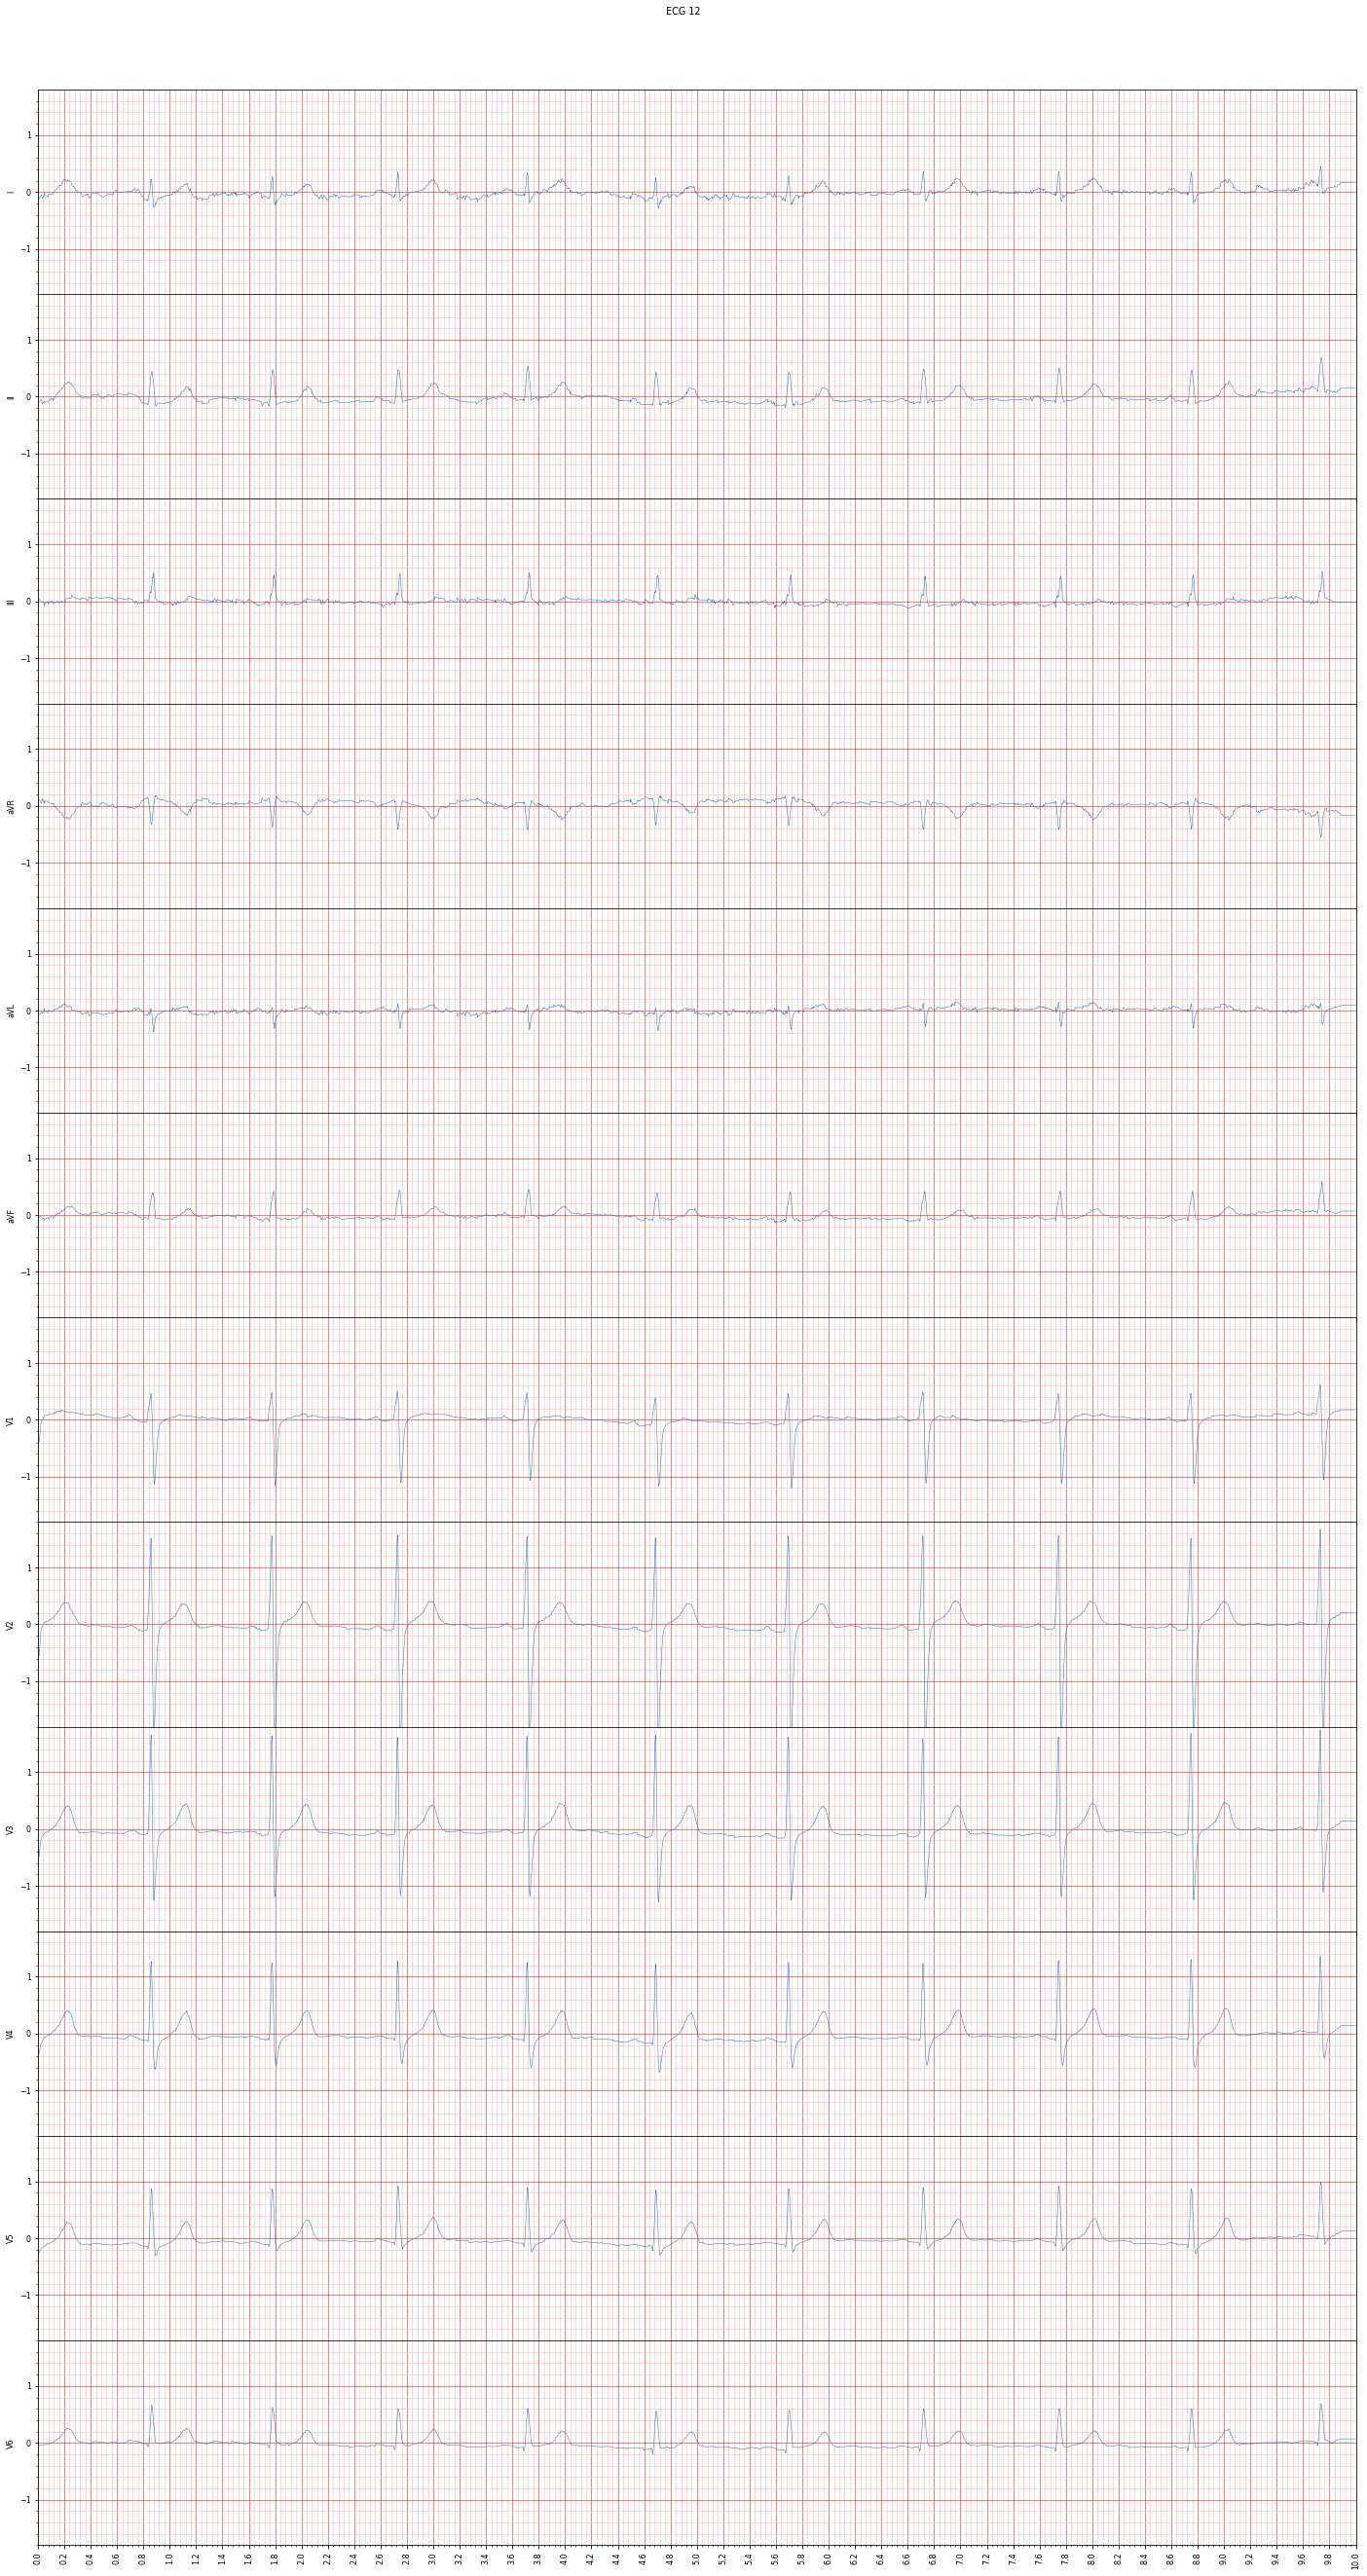

In [32]:
# strat_fold == 10, as 
# "Records in fold 9 and 10 underwent at least one human evaluation 
# and are therefore of a particularly high label quality."
show_record((meta[meta['strat_fold']==10].iloc[0]['record_name']), df)

00527_hr
47    1
Name: myocard, dtype: int64
   static_noise burst_noise baseline_drift electrodes_problems extra_beats  \
47          NaN       I-AVF           , V6                 NaN         NaN   

   pacemaker  
47       NaN  


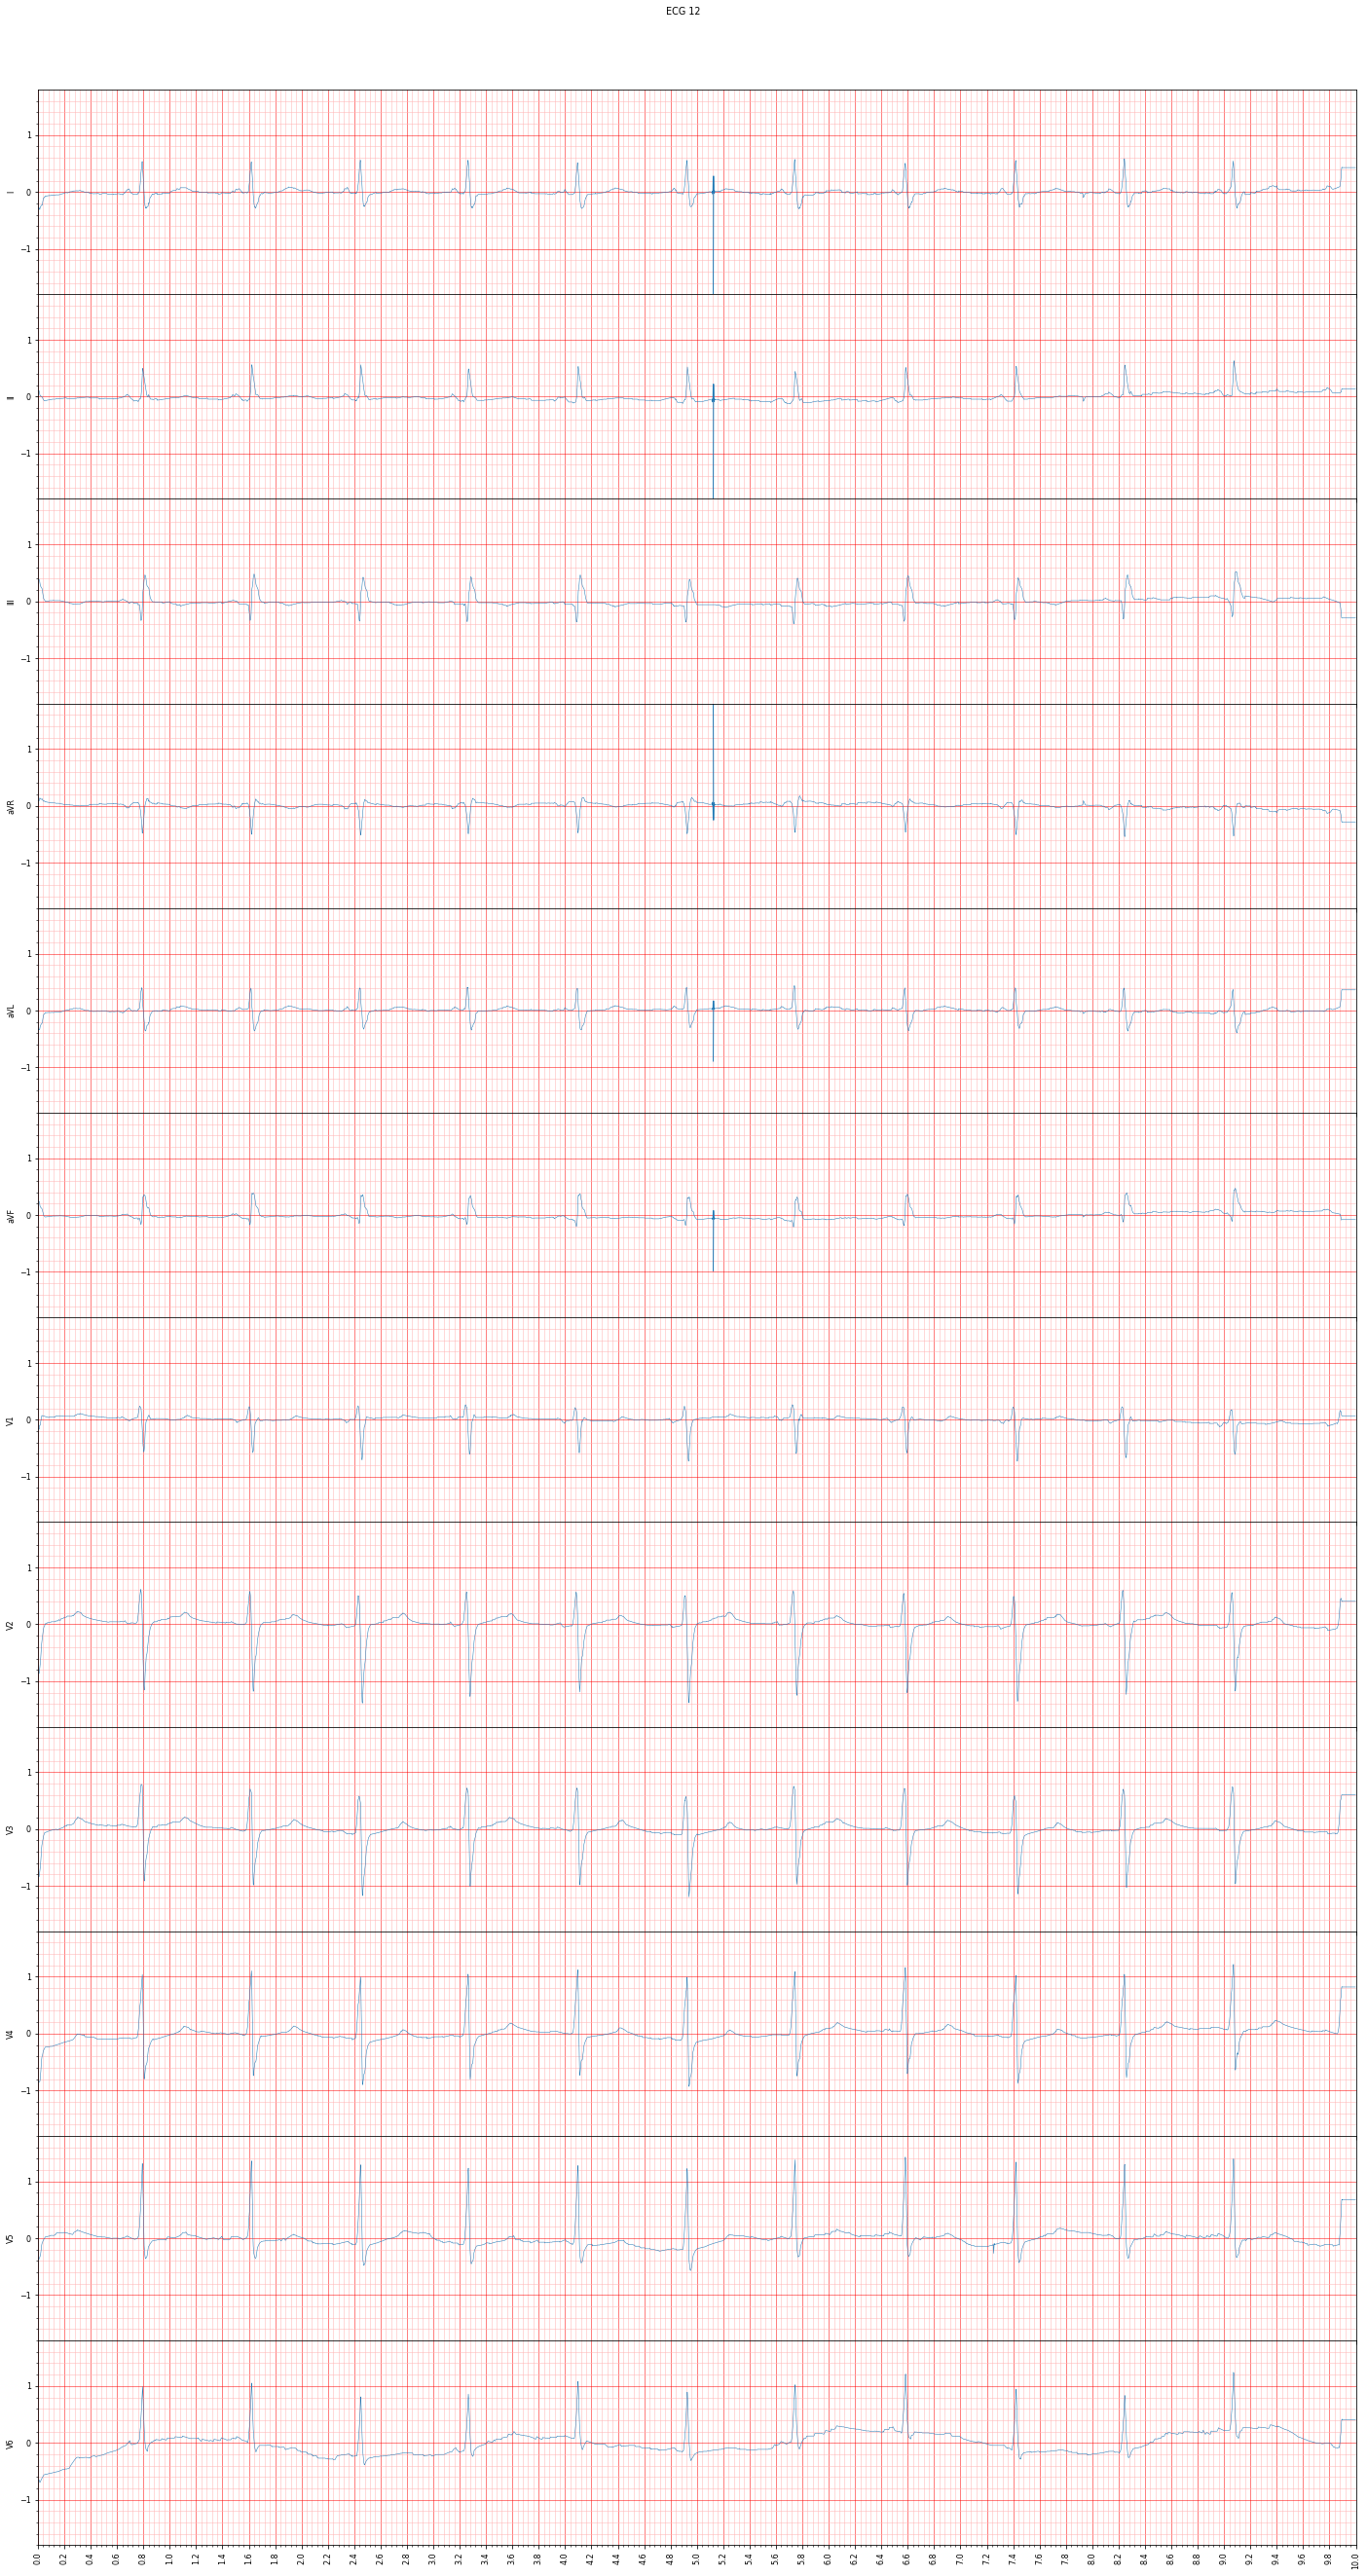

In [33]:
# strat_fold == 10, as 
# "Records in fold 9 and 10 underwent at least one human evaluation 
# and are therefore of a particularly high label quality."
show_record(df[(df['myocard']==1) &(df['strat_fold']==10)].iloc[0]['record_name'],df)

In [34]:
meta[meta["age"]>90]

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_name,group
8,108,11810.0,300.0,1,NaN,57.0,0.0,0.0,CS-12 E,1985-12-20 11:54:45,...,NaN,NaN,NaN,NaN,NaN,8,records100/00000/00108_lr,records500/00000/00108_hr,00108_hr,3
78,932,4887.0,300.0,0,170.0,70.0,1.0,1.0,AT-6 C 5.8,1987-07-17 08:52:59,...,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00932_lr,records500/00000/00932_hr,00932_hr,1
174,2008,2194.0,300.0,1,149.0,48.0,3.0,1.0,AT-6 C 5.0,1988-07-28 17:26:29,...,NaN,NaN,NaN,NaN,NaN,7,records100/02000/02008_lr,records500/02000/02008_hr,02008_hr,3
289,2924,12969.0,300.0,0,NaN,NaN,1.0,2.0,CS-12,1989-06-10 17:15:38,...,NaN,NaN,NaN,NaN,NaN,8,records100/02000/02924_lr,records500/02000/02924_hr,02924_hr,3
296,2983,3060.0,300.0,1,169.0,70.0,10.0,1.0,AT-6 C 5.5,1989-06-27 11:46:00,...,", leicht,",NaN,NaN,2ES,NaN,2,records100/02000/02983_lr,records500/02000/02983_hr,02983_hr,3
346,3563,21334.0,300.0,1,NaN,NaN,1.0,2.0,CS-12,1989-10-22 09:05:44,...,NaN,NaN,NaN,SVES,NaN,5,records100/03000/03563_lr,records500/03000/03563_hr,03563_hr,1
570,6027,1269.0,300.0,0,150.0,NaN,8.0,1.0,AT-6 C 5.5,1991-04-16 17:58:38,...,NaN,v6,NaN,1ES,NaN,6,records100/06000/06027_lr,records500/06000/06027_hr,06027_hr,1
625,6488,1476.0,300.0,0,160.0,55.0,7.0,1.0,AT-6 6,1991-07-15 14:29:09,...,NaN,NaN,NaN,NaN,NaN,8,records100/06000/06488_lr,records500/06000/06488_hr,06488_hr,3
629,6532,11010.0,300.0,0,NaN,NaN,0.0,0.0,CS100 3,1991-07-20 15:13:21,...,NaN,NaN,NaN,NaN,NaN,6,records100/06000/06532_lr,records500/06000/06532_hr,06532_hr,2
641,6664,6047.0,300.0,1,164.0,64.0,NaN,25.0,AT-6 C 5.8,1991-07-31 13:33:29,...,NaN,NaN,NaN,NaN,NaN,6,records100/06000/06664_lr,records500/06000/06664_hr,06664_hr,3


In [35]:
meta['record_name']

0       00009_hr
1       00034_hr
2       00043_hr
3       00052_hr
4       00057_hr
          ...   
2096    21784_hr
2097    21795_hr
2098    21825_hr
2099    21831_hr
2100    21834_hr
Name: record_name, Length: 2101, dtype: object

Очень много столбцов, где заполнено меньше 10% значений, поэтому я решил соединить их в "суперклассы", которые находятся в scp_statements.csv

In [36]:
# expand dicts into separate columns
scp_codes = df['scp_codes'].map(eval).apply(pd.Series)
scp_codes.merge
print(len(scp_codes.columns))
# percentage of non nan values
print((scp_codes.notna().sum()/len(scp_codes)).sort_values(ascending=False).iloc[:15])
(scp_codes.notna().sum()).sort_values(ascending=False).iloc[:15]

69
SR       0.744883
NORM     0.454545
ABQRS    0.145169
IMI      0.119467
ASMI     0.103284
LVH      0.098525
NDT      0.085673
AFIB     0.075678
LAFB     0.066159
ISC_     0.062351
IRBBB    0.057592
PVC      0.048072
STD_     0.047120
VCLVH    0.042837
STACH    0.041409
dtype: float64


SR       1565
NORM      955
ABQRS     305
IMI       251
ASMI      217
LVH       207
NDT       180
AFIB      159
LAFB      139
ISC_      131
IRBBB     121
PVC       101
STD_       99
VCLVH      90
STACH      87
dtype: int64

Все столбцы, где нет значения 'diagnostic class' - это abnormalities(так написано в столбце 'description')

In [37]:
scp_codes_description = pd.read_csv('./scp_statements.csv')
scp_codes_description = scp_codes_description.rename(columns={'Unnamed: 0': 'code'})

print("количество кодов",len(scp_codes_description))
superclasses = scp_codes_description\
    .groupby('diagnostic_class')['code'].unique().to_dict()
# these are codes for different abnormalities
abnormalities = scp_codes_description['code']\
    [scp_codes_description['diagnostic_class'].isna()].values
superclasses['abnormalities'] = abnormalities
print("словарь суперклассов",superclasses)

количество кодов 71
словарь суперклассов {'CD': array(['LAFB', 'IRBBB', '1AVB', 'IVCD', 'CRBBB', 'CLBBB', 'LPFB', 'WPW',
       'ILBBB', '3AVB', '2AVB'], dtype=object), 'HYP': array(['LVH', 'LAO/LAE', 'RVH', 'RAO/RAE', 'SEHYP'], dtype=object), 'MI': array(['IMI', 'ASMI', 'ILMI', 'AMI', 'ALMI', 'INJAS', 'LMI', 'INJAL',
       'IPLMI', 'IPMI', 'INJIN', 'INJLA', 'PMI', 'INJIL'], dtype=object), 'NORM': array(['NORM'], dtype=object), 'STTC': array(['NDT', 'NST_', 'DIG', 'LNGQT', 'ISC_', 'ISCAL', 'ISCIN', 'ISCIL',
       'ISCAS', 'ISCLA', 'ANEUR', 'EL', 'ISCAN'], dtype=object), 'abnormalities': array(['ABQRS', 'PVC', 'STD_', 'VCLVH', 'QWAVE', 'LOWT', 'NT_', 'PAC',
       'LPR', 'INVT', 'LVOLT', 'HVOLT', 'TAB_', 'STE_', 'PRC(S)', 'SR',
       'AFIB', 'STACH', 'SARRH', 'SBRAD', 'PACE', 'SVARR', 'BIGU', 'AFLT',
       'SVTAC', 'PSVT', 'TRIGU'], dtype=object)}


In [38]:


for superclass, columns in superclasses.items():
    columns = [col.strip() for col in columns]

    for code in columns:
        if code not in scp_codes.columns:
            columns.remove(code)

    scp_codes[superclass] = scp_codes[columns].sum(axis=1)
    scp_codes=scp_codes.drop(columns=columns)

superclasses["NORM"] = []

In [39]:
df = df.merge(scp_codes, left_index=True, right_index=True)

Информация про инфаркт миакарда, которую я получил из scp codes, и информацей, которая была дана изначально, не всегда совпадает. 

In [40]:
print((df[df['myocard']==1]["MI"]==0).sum())
print("процент отлчиающихся значений миакарда",(df[df['myocard']==1]["MI"]==0).sum()/len(df[df['myocard']==1]))

73
процент отлчиающихся значений миакарда 0.17590361445783131


Это написано в ридми датасета 
Records in fold 9 and 10 underwent at least one human evaluation and are therefore of a particularly high label quality. We therefore propose to use folds 1-8 as training set, fold 9 as validation set and fold 10 as test set.

In [41]:
from sklearn.preprocessing import Normalizer

# normalize values
values = df[['CD', "HYP", "MI", "STTC", 'abnormalities']].values 
df[['CD', "HYP", "MI", "STTC", 'abnormalities']] = Normalizer().fit_transform(values)

annotations = df[['record_name', 'strat_fold','myocard', 'CD', "HYP", "MI", "STTC", 'abnormalities']]

#TODO этот столбец не всегда совпадает с "MI" 
# поэтому пока без него, надо попробовать их соединить потом.
annotations = annotations.drop('myocard',axis=1)


val_annotations = annotations[annotations['strat_fold'].isin([8, 9, 10])]
train_annotations = annotations[annotations['strat_fold'].isin(range(1,8))]
val_annotations.to_csv('./val_annotations.csv', index=False)
train_annotations.to_csv('./train_annotations.csv', index=False)

print("validation percentage:",len(val_annotations) / len(annotations))
print("train percentage:",len(train_annotations) / len(annotations))
print("VALIDATION", val_annotations["MI"].value_counts(normalize=True))
print("TTRAIN", train_annotations["MI"].value_counts(normalize=True))


validation percentage: 0.32413136601618275
train percentage: 0.6758686339838172
VALIDATION 0.000000    0.765051
1.000000    0.102790
0.707107    0.017621
0.447214    0.016153
0.894427    0.014684
0.577350    0.013216
0.148340    0.010279
0.832050    0.004405
0.132973    0.004405
0.105474    0.002937
0.408248    0.002937
0.816497    0.002937
0.074790    0.002937
0.277350    0.002937
0.330350    0.002937
0.754606    0.002937
0.377964    0.002937
0.647648    0.001468
0.600000    0.001468
0.720577    0.001468
0.333333    0.001468
0.906721    0.001468
0.242536    0.001468
0.086280    0.001468
0.717002    0.001468
0.516847    0.001468
0.362143    0.001468
0.240239    0.001468
0.801784    0.001468
0.666667    0.001468
0.485071    0.001468
0.970143    0.001468
0.686398    0.001468
0.500000    0.001468
0.316228    0.001468
0.052959    0.001468
Name: MI, dtype: float64
TTRAIN 0.000000    0.765493
1.000000    0.100704
0.707107    0.025352
0.148340    0.014789
0.447214    0.014085
0.894427    0.01